In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import numpy as np

## Load the data

In [ ]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')
white['wine_type']='white'
red['wine_type']='red'

In [ ]:
cmb_wine_data=pd.concat([white,red])

In [ ]:
cmb_wine_data['wine_type_res']= np.where(cmb_wine_data['wine_type']=="white",1,0)

In [ ]:
cmb_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_type_res
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,1


In [ ]:
cmb_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type', 'wine_type_res'],
      dtype='object')

### Distrbution of the response variable

In [ ]:
cmb_wine_data['wine_type'].value_counts()

wine_type
white    4898
red      1599
Name: count, dtype: int64

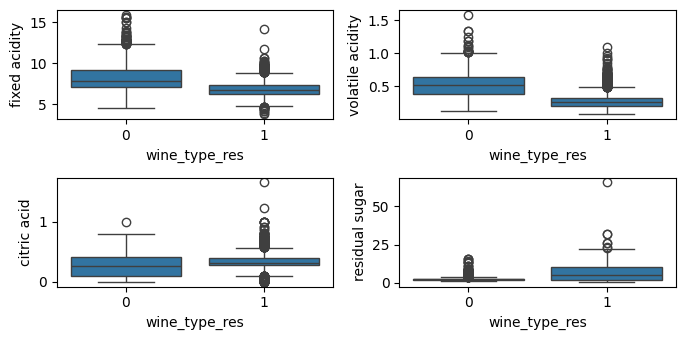

In [ ]:
import seaborn
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes=plt.subplots(2,2)
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="fixed acidity",ax=axes[0,0])
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="volatile acidity", ax=axes[0,1])
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="citric acid", ax=axes[1,0])
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="residual sugar", ax=axes[1,1])
plt.show()

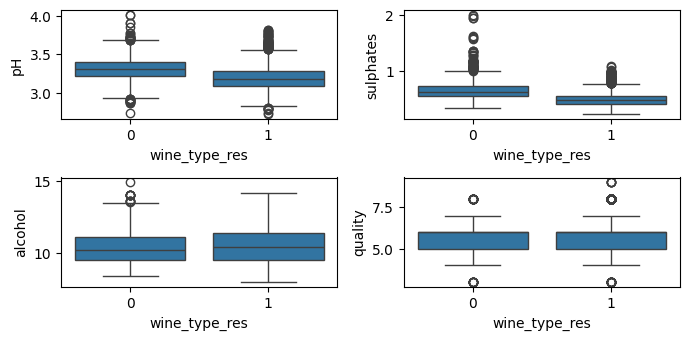

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes=plt.subplots(2,2)
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="pH",ax=axes[0,0])
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="sulphates", ax=axes[0,1])
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="alcohol", ax=axes[1,0])
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="quality", ax=axes[1,1])
plt.show()

<Axes: xlabel='wine_type_res', ylabel='residual sugar'>

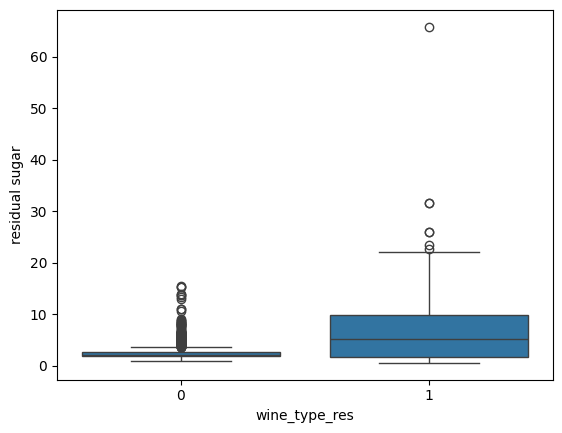

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes=plt.subplots(2,2)
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="chlorides",ax=axes[0,0])
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="free sulfur dioxide", ax=axes[0,1])
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="total sulfur dioxide", ax=axes[1,0])
seaborn.boxplot(data=cmb_wine_data , x="wine_type_res",y="density", ax=axes[1,1])
plt.show()

In [ ]:
cmb_wine_data[['fixed acidity','wine_type_res']].groupby(['wine_type_res']).mean()

,fixed acidity
wine_type_res,
0,8.319637
1,6.854788


In [ ]:
freq=pd.crosstab(cmb_wine_data['wine_type_res'],cmb_wine_data['quality'] ,normalize='index')
freq*100


quality,3,4,5,6,7,8,9
wine_type_res,,,,,,,
0,0.625391,3.314572,42.589118,39.899937,12.445278,1.125704,0.000000
1,0.408330,3.327889,29.746835,44.875459,17.966517,3.572887,0.102082


In [ ]:
freq/len(cmb_wine_data)

quality,3,4,5,6,7,8,9
wine_type_res,,,,,,,
0,0.001539,0.008158,0.104818,0.098199,0.030630,0.002771,0.00000
1,0.003078,0.025089,0.224257,0.338310,0.135447,0.026936,0.00077


In [ ]:
cmb_wine_data[['wine_type_res','quality']].groupby(['','wine_type_res']).count()

Empty DataFrame
Columns: []
Index: [(3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 1)]

In [ ]:
cmb_wine_data.loc[cmb_wine_data['wine_type']=="red"].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_type_res
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [ ]:
X=cmb_wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [ ]:
y=cmb_wine_data[['wine_type_res']]
X=X.to_numpy()
y=y.to_numpy()
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float).squeeze()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [ ]:
X.dtype

torch.float32

In [ ]:
X.shape, y.shape

(torch.Size([6497, 11]), torch.Size([6497]))

In [ ]:
X_train.shape , X_test.shape , y_train.shape, y_test.shape

(torch.Size([5197, 11]),
 torch.Size([1300, 11]),
 torch.Size([5197]),
 torch.Size([1300]))

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn

class ModelWine(nn.Module):
  def __init__(self, inp_features, out_features, hidden_units):
    super().__init__()
    self.layer1=nn.Linear(in_features=inp_features ,out_features=hidden_units)
    self.layer2=nn.Linear(in_features=hidden_units,out_features=hidden_units)
    self.layer3=nn.Linear(in_features=hidden_units,out_features=out_features)


  def forward(self,X):
    return self.layer3(self.layer2(self.layer1(X)))
Mod0=ModelWine(inp_features=11, out_features=1, hidden_units=32).to(device)

In [ ]:
class ModelWineV2(nn.Module):
  def __init__(self, inp_features,out_features, hidden_units):
    super().__init__()
    self.layer1=nn.Linear(in_features=inp_features,out_features=hidden_units)
    self.layer2=nn.Linear(in_features=hidden_units,out_features=out_features)
    self.relu=nn.ReLU()


  def forward(self,X):
    return self.layer2(self.relu(self.layer1(X)))

Mod0=ModelWineV2(inp_features=11,out_features=1,hidden_units=8)
Mod0




ModelWineV2(
  (layer1): Linear(in_features=11, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
Mod0

ModelWine(
  (layer1): Linear(in_features=11, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:

loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(params=Mod0.parameters(), lr=0.01)

In [ ]:
def acc_fn(y_true, y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
epochs=500

X_train, y_train = X_train.to(device) , y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  Mod0.train()

  y_logits=Mod0(X_train).squeeze()
  y_pred_probs_train=torch.round(torch.sigmoid(y_logits))

  train_loss=loss_fn(y_logits,y_train)
  train_acc = acc_fn(y_true=y_train , y_pred=y_pred_probs_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  Mod0.eval()

  with torch.inference_mode():
    y_logits_test=Mod0(X_test).squeeze()
    y_pred_probs_test=torch.round(torch.sigmoid(y_logits_test))

    test_loss=loss_fn(y_logits_test,y_test)
    test_acc=acc_fn(y_pred=y_pred_probs_test , y_true=y_test)

  if epoch % 50 == 0:
    print(f" Epoch: {epoch} | Train_loss: {train_loss:.2f} | Train_acc: {train_acc:.2f} |Test_loss: {test_loss:.2f} | Test_acc: {test_acc:.2f}")








 Epoch: 0 | Train_loss: 0.05 | Train_acc: 98.60 |Test_loss: 0.07 | Test_acc: 98.15
 Epoch: 50 | Train_loss: 0.05 | Train_acc: 98.50 |Test_loss: 0.07 | Test_acc: 98.00
 Epoch: 100 | Train_loss: 0.05 | Train_acc: 98.48 |Test_loss: 0.08 | Test_acc: 97.69
 Epoch: 150 | Train_loss: 0.05 | Train_acc: 98.50 |Test_loss: 0.07 | Test_acc: 98.00
 Epoch: 200 | Train_loss: 0.05 | Train_acc: 98.63 |Test_loss: 0.07 | Test_acc: 98.00
 Epoch: 250 | Train_loss: 0.05 | Train_acc: 98.65 |Test_loss: 0.07 | Test_acc: 98.08
 Epoch: 300 | Train_loss: 0.05 | Train_acc: 98.75 |Test_loss: 0.07 | Test_acc: 98.15
 Epoch: 350 | Train_loss: 0.05 | Train_acc: 98.69 |Test_loss: 0.06 | Test_acc: 98.23
 Epoch: 400 | Train_loss: 0.05 | Train_acc: 98.69 |Test_loss: 0.06 | Test_acc: 98.00
 Epoch: 450 | Train_loss: 0.05 | Train_acc: 98.69 |Test_loss: 0.07 | Test_acc: 97.92


In [ ]:
class ModelWineV2(nn.Module):
  def __init__(self, inp_feat, out_feat,hidden_units):
    super().__init__()
    self.layer1=nn.Linear(in_features=inp_feat, out_features=hidden_units)
    self.layer2=nn.Linear(in_features=hidden_units , out_features=out_feat)
    #self.layer3=nn.Linear(in_features=hidden_units , out_features=out_feat)
    self.relu=nn.ReLU()
  def forward(self,X):
    return  self.layer2(self.relu(self.layer1(X)))

Mod1=ModelWineV2(inp_feat=12,out_feat=1,hidden_units=8).to(device)


In [ ]:
Mod1

ModelWineV2(
  (layer1): Linear(in_features=12, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:

loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=Mod1.parameters(), lr=0.01)

In [ ]:
epochs=1000

X_train, y_train= X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  Mod1.train()

  y_logits=Mod1(X_train).squeeze()
  y_pred_probs_train= torch.round(torch.sigmoid(y_logits))

  train_loss=loss_fn(y_logits, y_train)
  train_acc=acc_fn(y_pred=y_pred_probs_train, y_true=y_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  Mod1.eval()

  with torch.inference_mode():
    y_logits_test=Mod1(X_test).squeeze()
    y_pred_probs_test=torch.round(torch.sigmoid(y_logits_test))

    test_loss=loss_fn(y_logits_test, y_test)
    test_acc=acc_fn(y_pred=y_pred_probs_test, y_true=y_test)

  if epoch %100==0:
    print(f"Epoch: {epoch} | Train_loss: {train_loss:.2f} | Train_acc: {train_acc:.2f} |Test_loss: {test_loss:.2f} | Test_acc: {test_acc:.2f}")

Epoch: 0 | Train_loss: 0.48 | Train_acc: 75.27 |Test_loss: 0.47 | Test_acc: 75.85
Epoch: 100 | Train_loss: 0.24 | Train_acc: 93.38 |Test_loss: 0.26 | Test_acc: 92.38
Epoch: 200 | Train_loss: 0.24 | Train_acc: 92.55 |Test_loss: 0.25 | Test_acc: 91.85
Epoch: 300 | Train_loss: 0.23 | Train_acc: 93.07 |Test_loss: 0.24 | Test_acc: 91.23
Epoch: 400 | Train_loss: 0.23 | Train_acc: 93.32 |Test_loss: 0.24 | Test_acc: 91.38
Epoch: 500 | Train_loss: 0.22 | Train_acc: 93.36 |Test_loss: 0.23 | Test_acc: 91.62
Epoch: 600 | Train_loss: 0.22 | Train_acc: 93.42 |Test_loss: 0.23 | Test_acc: 92.00
Epoch: 700 | Train_loss: 0.21 | Train_acc: 93.55 |Test_loss: 0.23 | Test_acc: 92.00
Epoch: 800 | Train_loss: 0.21 | Train_acc: 93.63 |Test_loss: 0.22 | Test_acc: 92.23
Epoch: 900 | Train_loss: 0.21 | Train_acc: 93.65 |Test_loss: 0.22 | Test_acc: 92.38


In [ ]:
epochs=500

X_train, y_train = X_train.to(device) , y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  Mod1.train()

  y_logits=Mod1(X_train).squeeze()
  y_pred_probs_train=torch.round(torch.sigmoid(y_logits))

  train_loss=loss_fn(y_logits,y_train)
  train_acc = acc_fn(y_true=y_train , y_pred=y_pred_probs_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  Mod1.eval()

  with torch.inference_mode():
    y_logits_test=Mod1(X_test).squeeze()
    y_pred_probs_test=torch.round(torch.sigmoid(y_logits_test))

    test_loss=loss_fn(y_logits_test,y_test)
    test_acc=acc_fn(y_pred=y_pred_probs_test , y_true=y_test)

  if epoch % 10 == 0:
    print(f" Epoch: {epoch} | Train_loss: {train_loss:.2f} | Train_acc: {train_acc:.2f} |Test_loss: {test_loss:.2f} | Test_acc: {test_acc:.2f}")



 Epoch: 0 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 10 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 20 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 30 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 40 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 50 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 60 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 70 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 80 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 90 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 100 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_acc: 70.92
 Epoch: 110 | Train_loss: 0.65 | Train_acc: 70.02 |Test_loss: 0.64 | Test_ac